In [2]:
## The data set contains gene expression data (200 genes for 120 samples) 
## and gene expression levels of TRIM32 from the microarray experiments of 
## mammalian eye tissue samples of Scheetz et al. (2006).

library(glmnet)
library(NormalBetaPrime)
data(eyedata, package="NormalBetaPrime") 

str(genes)
str(trim32)

 num [1:120, 1:200] 3.68 3.58 3.85 4.13 3.88 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:120] "V2" "V3" "V4" "V5" ...
  ..$ : chr [1:200] "1377" "1748" "2487" "2679" ...
 num [1:120] 8.42 8.36 8.41 8.29 8.27 ...


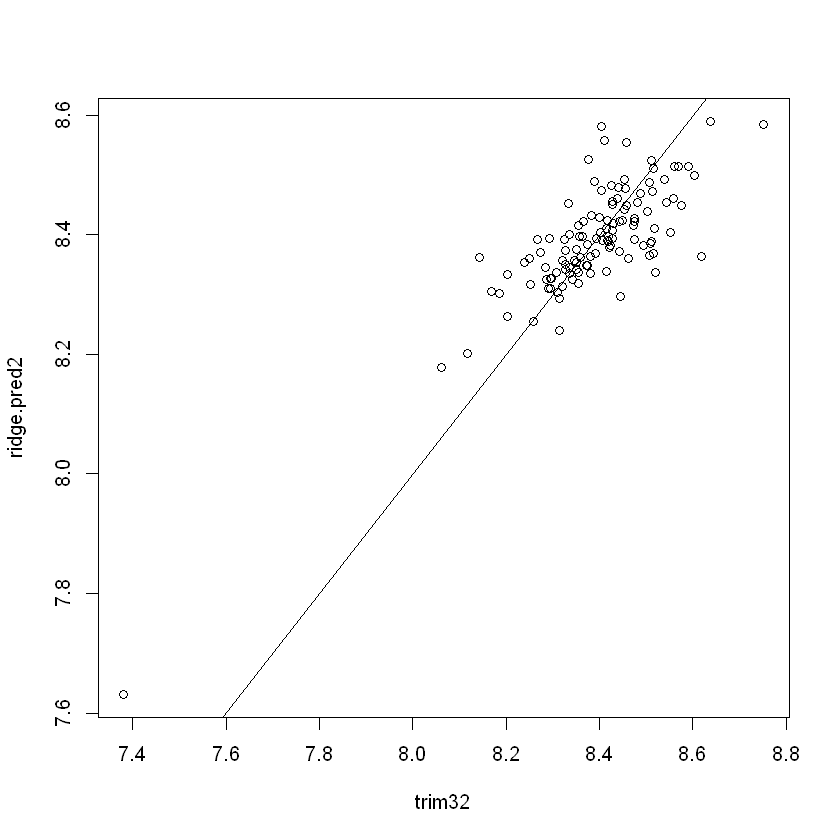

In [3]:
## Ridge, fixed lambda
lam <- 2
ridge.mod2 <- glmnet(genes, trim32, alpha = 0, lambda = lam)

ridge.pred2 <- predict(ridge.mod2, s = 4, newx=genes)
plot(trim32, ridge.pred2)
abline(a=0, b=1)

In [4]:
## Reserve 40 samples for testing:
set.seed(1)
test.sample <- sample(nrow(genes), 40)

# Training data
trainX <- genes[-test.sample, ]
trainY <- trim32[-test.sample]

# Test data
testX <- genes[test.sample, ]
testY <- trim32[test.sample]

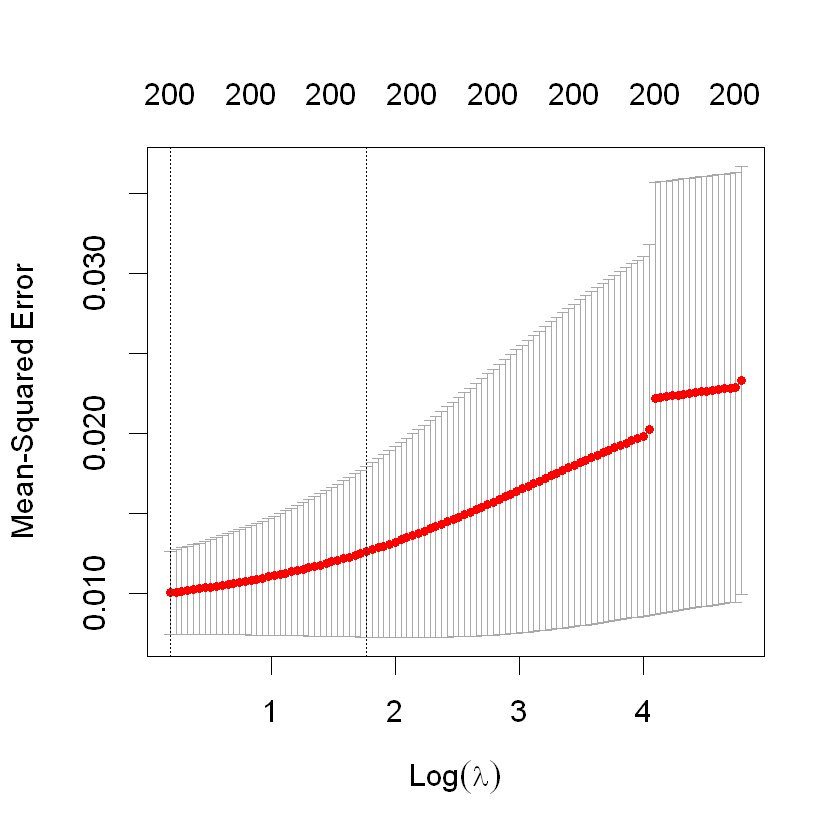

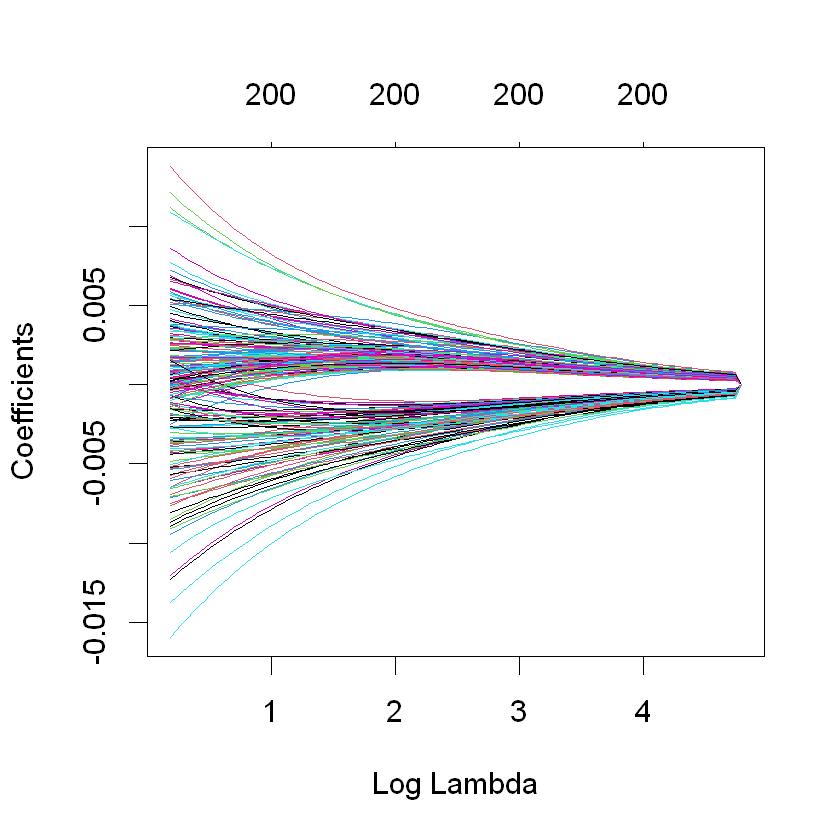

In [6]:
## Ridge regression.

## Basic usage:      glmnet(X, y, alpha, ...)
## Cross-validation: cv.glmnet(X, y, alpha, ...)
## Ridge: alpha = 0, LASSO: alpha = 1

set.seed(2)

ridge.cv <- cv.glmnet(trainX, trainY, alpha = 0, 
                      nfolds = 10, type.measure = "mse")

par(cex=1.5)
plot(ridge.cv)
plot(ridge.cv$glmnet.fit, xvar = "lambda")

[1] 0.007900823

[1] 0.007350649

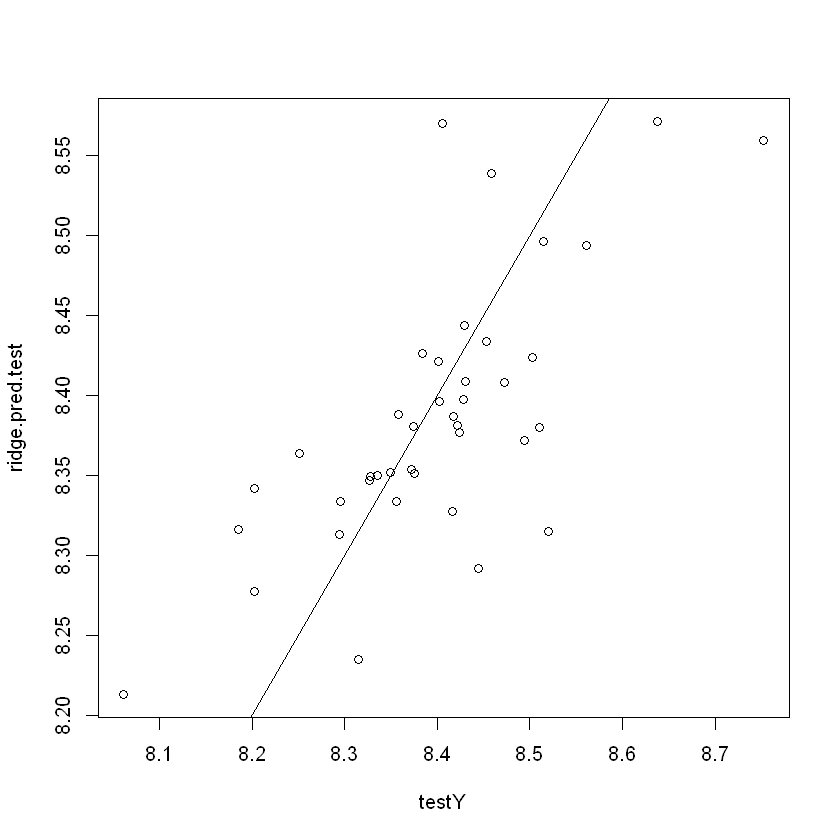

In [7]:
### Ridge, training and test MSE:

bestlam <- ridge.cv$lambda.1se

ridge.pred.train <- predict(ridge.cv, s = bestlam, newx = trainX)
mean((ridge.pred.train - trainY)^2)

ridge.pred.test <- predict(ridge.cv, s = bestlam, newx = testX)
mean((ridge.pred.test - testY)^2)

plot(testY, ridge.pred.test)
abline(0, 1)

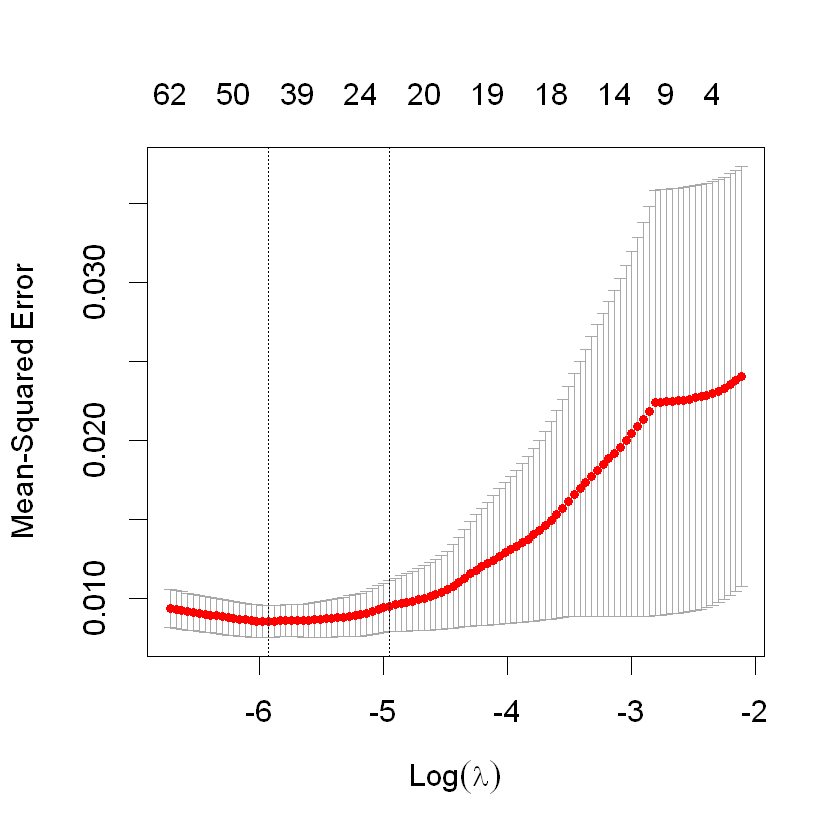

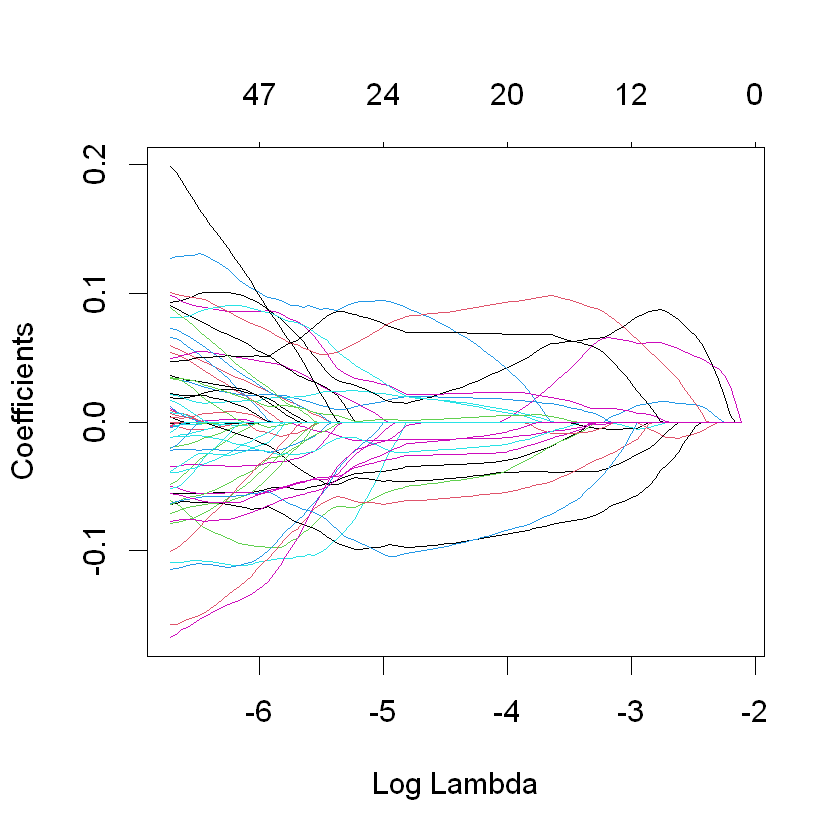

In [8]:
## LASSO regression.

## Basic usage:      glmnet(X, y, alpha, ...)
## Cross-validation: cv.glmnet(X, y, alpha, ...)

## Set alpha = 0 for ridge, alpha = 1 for LASSO

set.seed(2)
lasso.cv <- cv.glmnet(trainX, trainY, alpha = 1, 
                      nfolds = 10, type.measure = "mse")

par(cex=1.5)
plot(lasso.cv)
plot(lasso.cv$glmnet.fit, xvar = "lambda")

In [9]:
## Two methods to extract the coefficients:
lasso.coef <- coef(lasso.cv, s=lasso.cv$lambda.1se) 
lasso.coef.v2  <- predict(lasso.cv, type="coef", 
                          s=lasso.cv$lambda.1se)

## Get the non-zero coefficients:
nz.ind <- which(lasso.coef != 0, arr.ind=TRUE)
cbind( nz.ind, lasso.coef[nz.ind] )

row col             
(Intercept)   1 1    8.183204335
6247         14 1    0.017371768
14949        55 1    0.021739735
15863        63 1   -0.037718840
17599        77 1   -0.023908145
21092        88 1   -0.045821812
22029       100 1    0.016216838
22140       103 1   -0.054124153
22813       111 1   -0.014230088
22935       114 1   -0.063687940
23804       128 1   -0.095577858
24565       141 1    0.094027523
24892       147 1    0.028279565
25141       154 1    0.076820863
25903       162 1    0.027520193
26672       165 1   -0.029120962
28383       180 1   -0.013460774
28680       181 1    0.074419935
28964       185 1    0.002101583
28967       186 1   -0.104491142
29041       188 1   -0.022182134
29045       189 1   -0.003342627
30141       201 1   -0.023029073

In [10]:
## No. of zero coefficients:
length( which(lasso.coef == 0) )

[1] 178

In [11]:
### LASSO, training and test MSE:

bestlam <- lasso.cv$lambda.1se

pred.train <- predict(lasso.cv, s = bestlam, newx = trainX)
mean((pred.train - trainY)^2)

pred.test <- predict(lasso.cv, s = bestlam, newx = testX)
mean((pred.test - testY)^2)

[1] 0.003809128

[1] 0.006071043

In [12]:
### LASSO, another way to get training and test MSE.
### A bit different from above, which is due to numerical implementation.

model <- glmnet(trainX, trainY, alpha = 1,
                lambda = bestlam)

mean( (predict(model, newx = trainX) - trainY)^2 )
mean( (predict(model, newx = testX) - testY)^2 )

[1] 0.003808745

[1] 0.006070253

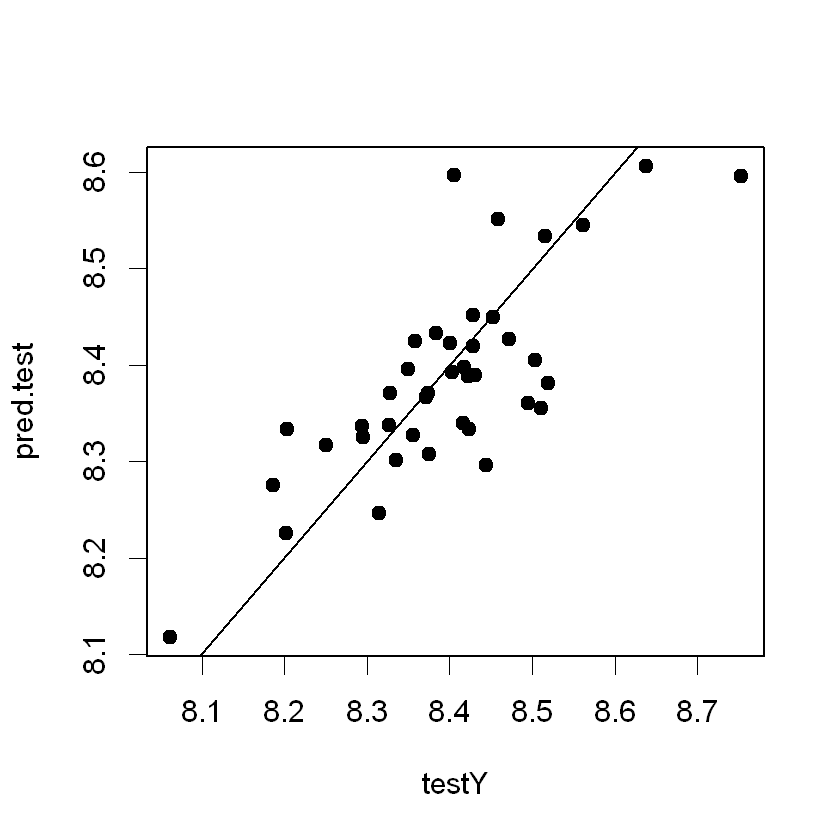

In [13]:
## Plot test prediction v.s. observation:
par(cex=1.5, pch=19, lwd=2)
plot(testY, pred.test)
abline(0, 1)